## Multilayer Perceptrons

### **introduction**
A multilayer perceptron is a type of feedforward neural network consisting of fully connected neurons with a nonlinear kind of activation function. It is widely used to distinguish data that is not linearly separable.
- **Where to use MLP**

    MLPs have been widely used in various fields, including image recognition, natural language processing, and speech recognition, among others. Their flexibility in architecture and ability to approximate any function under certain conditions make them a fundamental building block in deep learning and neural network research. Let's take a deeper dive into some of its key concepts.

### **Architecture**
- **Input layer**

    The input layer consists of nodes or neurons that receive the initial input data. Each neuron represents a feature or dimension of the input data. The number of neurons in the input layer is determined by the dimensionality of the input data.

- **Hidden layer**

    Between the input and output layers, there can be one or more layers of neurons. Each neuron in a hidden layer receives inputs from all neurons in the previous layer (either the input layer or another hidden layer) and produces an output that is passed to the next layer. The number of hidden layers and the number of neurons in each hidden layer are hyperparameters that need to be determined during the model design phase.

- **Output layer**

    This layer consists of neurons that produce the final output of the network. The number of neurons in the output layer depends on the nature of the task. In binary classification, there may be either one or two neurons depending on the activation function and representing the probability of belonging to one class; while in multi-class classification tasks, there can be multiple neurons in the output layer.

- **Activation Function**

    Typically, each neuron in the hidden layers and the output layer applies an activation function to its weighted sum of inputs. Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax. These functions introduce nonlinearity into the network, allowing it to learn complex patterns in the data.

- **Training with Backpropagation**

    MLPs are trained using the backpropagation algorithm, which computes gradients of a loss function with respect to the model's parameters and updates the parameters iteratively to minimize the loss.

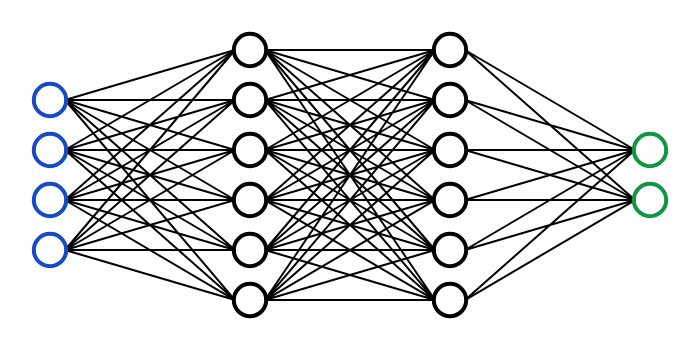\
image from https://victorzhou.com/series/neural-networks-from-scratch/


### **Activation Function**
Typically, each neuron in the hidden layers and the output layer applies an activation function to its weighted sum of inputs. Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax. These functions introduce nonlinearity into the network, allowing it to learn complex patterns in the data.
- **Why Do We Need Nonlinear Activation Functions?**\

    If all the activation functions in each layer are linear then this is just equal to another linear function!

    Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases.

- **Some Common Activation Functions**

    **Sigmoid**:\
        Equation : $\frac{1}{1+e^{-x}}$\
        Uses : Usually used in output layer of a binary classification, where result is either 0 or 1, as value for sigmoid function lies between 0 and 1 only so, result can be predicted easily to be 1 if value is greater than 0.5 and 0 otherwise.\
        Vanishing Gradient problem: In neural networks, the gradient (of the loss function) at each layer is the gradient at its subsequent layer multiplied by the gradient of its activation function. As there are many layers in the network, if the gradient of the activation functions is less than 1, the gradient at some layer far away from the output will be close to zero. And any layer with a gradient close to zero will stop the gradient propagation further back to the earlier layers.

    **Tanh**:\
        The activation that works almost always better than sigmoid function is Tanh function also known as Tangent Hyperbolic function. It’s actually mathematically shifted version of the sigmoid function. Both are similar and can be derived from each other.\
        Equation : $\frac{2}{1+e^{-2x}}-1$\
        Uses : Usually used in hidden layers of a neural network as it’s values lies between -1 to 1 hence the mean for the hidden layer comes out be 0 or very close to it, hence helps in centering the data by bringing mean close to 0. This makes learning for the next layer much easier.

    **ReLU**:\
        It Stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.\
        Equation : max(0,x). It gives an output x if x is positive and 0 otherwise.\
        Uses : ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

    **Softmax**:\
        The softmax function is also a type of sigmoid function but is handy when we are trying to handle multi- class classification problems.\
        Equation : ${\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}}  \;\;\;  for \;\; j = 1, …, K $\
        Uses : Usually used when trying to handle multiple classes. the softmax function was commonly found in the output layer of image classification problems.The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs. \


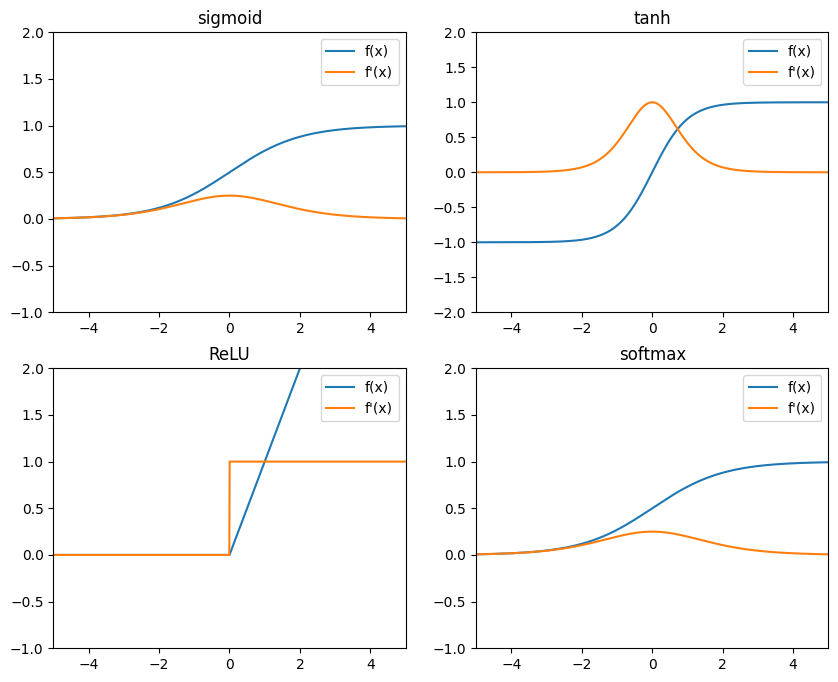

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(-5,  5, 1000)
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(x, 1/(1+np.exp(-x)),label = 'f(x)')
plt.plot(x, np.exp(-x)/(1+np.exp(-x))**2,label = 'f\'(x)')
plt.title('sigmoid')
plt.axis([-5, 5, -1, 2])
plt.legend()
 
plt.subplot(2, 2, 2)
plt.plot(x, np.tanh(x),label = 'f(x)')
plt.plot(x, 4*np.exp(-x*2)/(1+np.exp(-x*2))**2,label = 'f\'(x)')
plt.title('tanh')
plt.axis([-5, 5, -2, 2])
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, np.hstack((np.zeros(500),x[500:])),label = 'f(x)')
plt.plot(x, np.hstack((np.zeros(500),np.ones(500))),label = 'f\'(x)')
plt.axis([-5, 5, -1, 2])
plt.title('ReLU')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, np.exp(x)/(1+np.exp(x)),label = 'f(x)')
plt.plot(x, np.exp(-x)/(1+np.exp(-x))**2,label = 'f\'(x)')
plt.axis([-5, 5, -1, 2])
plt.title('softmax')
plt.legend()

 
plt.show()

### **Hidden layer**
The hidden layers of an MLP consist of interconnected neurons that perform computations on the input data.

Each neuron in a hidden layer receives input from all neurons in the previous layer. The inputs are multiplied by corresponding weights, denoted as w. The weights determine how much influence the input from one neuron has on the output of another.

In addition to weights, each neuron in the hidden layer has an associated bias, denoted as b. The bias provides an additional input to the neuron, allowing it to adjust its output threshold. Like weights, biases are learned during training.

For each neuron in a hidden layer or the output layer, the weighted sum of its inputs is computed. This involves multiplying each input by its corresponding weight, summing up these products, and adding the bias:

$\;\;\;\;\;\;\;   \text{Suppose we have n input nodes in input layers and the first hidden layer have m nodes}$
$$
    \sum_{i=1}^{n}w_ix_i + b = \bf{w}^T  \bf{x} + b
$$

Where n is the total number of input connections,$w_i$ is the weight for the i-th input, and $x_i$ is the i-th input value.

The weighted sum is then passed through an activation function, denoted as f. The activation function introduces nonlinearity into the network, allowing it to learn and represent complex relationships in the data. The activation function determines the output range of the neuron and its behavior in response to different input values. The choice of activation function depends on the nature of the task and the desired properties of the network.
$$
\text{Example:}\; \bf{\hat{y_j}} = f({\bf w_i}^T  {\bf x} + b),\; j = 1 \dots m , \; where\; f(x) = max \{ 0,x \} \; (this\; function \;is \;called \;ReLU)
$$


### **Backward propagation**
Backpropagation is short for “backward propagation of errors.” In the context of backpropagation, SGD involves updating the network's parameters iteratively based on the gradients computed during each batch of training data. Instead of computing the gradients using the entire training dataset (which can be computationally expensive for large datasets), SGD computes the gradients using small random subsets of the data called mini-batches. Here’s an overview of how backpropagation algorithm works:

**Step1: Forward pass**\
During the forward pass, input data is fed into the neural network, and the network's output is computed layer by layer. Each neuron computes a weighted sum of its inputs, applies an activation function to the result, and passes the output to the neurons in the next layer.
$$
\overbrace{\text{input} \stackrel{\text{features extracted}}{\longrightarrow} {\bf x}}^{\text{input layer}} 
\overbrace{\stackrel{ \text{Linear\&Activation} }{\longrightarrow} {\bf z} \stackrel{\text{Linear\&Activation}}{\longrightarrow}}^{\text{hidden layer}} 
\overbrace{{\bf y} \stackrel{ \text{Linear\&Activation} }{\longrightarrow} \text{output}}^{\text{output layer}}
$$

**Step2: Loss computation**\
After the forward pass, the network's output is compared to the true target values, and a loss function is computed to measure the discrepancy between the predicted output and the actual output.
$$
\text{Example:}\;L({\bf w_1, \dots ,w_n, b}) = \sum_{j=1}^{m}||\bf{\hat{y_j}-y_j}||^2
$$

**Step3: Backward Pass (Gradient Calculation)**\
In the backward pass, the gradients of the loss function with respect to the network's parameters (weights and biases) are computed using the chain rule of calculus. The gradients represent the rate of change of the loss function with respect to each parameter and provide information about how to adjust the parameters to decrease the loss.


**Step4: Parameter update**\
Once the gradients have been computed, the network's parameters are updated in the opposite direction of the gradients in order to minimize the loss function. This update is typically performed using an optimization algorithm such as stochastic gradient descent (SGD), that we discussed earlier.
$$
{\displaystyle w_{t+1}:=w_t-\eta \,\nabla L(w_t)}
$$


**Step5: Iterative Process**\
Steps 1-4 are repeated iteratively for a fixed number of epochs or until convergence criteria are met. During each iteration, the network's parameters are adjusted based on the gradients computed in the backward pass, gradually reducing the loss and improving the model's performance.



### **Stochastic Gradient Descent(SGD)**
**Step1: Initialization**\
SGD starts with an initial set of model parameters (weights and biases) randomly or using some predefined method.
 
**Step2: Iterative Optimization**\
The aim of this step is to find the minimum of a loss function, by iteratively moving in the direction of the steepest decrease in the function's value.\
For each iteration (or epoch) of training, update the model parameters by taking a step in the opposite direction of the gradient, scaled by a learning rate:
$$
{\displaystyle \bf \Theta_{t+1}:=\bf \Theta_t-\eta \,\nabla L(\bf \Theta_t)=\bf \Theta_t-{\frac {\eta }{n}}\sum _{l=1}^{n}\nabla L_{l}(\bf \Theta_t).}
$$
where $\eta$ is learning rate, n is number of element in a mini-batch\
\
suppose we have only one hidden layer and $\displaystyle \hat{y_l} = f_2(\sum_{j=1}^m{v_{l,j}z_j}+c)$ and $\displaystyle z_j = f_1(\sum_{i=1}^{n}{w_{j,i}x_i}+b)$, where $f_1,\;f_2$ are activation function\
$
L(\bf \Theta) := ||\bf{\hat{y}-y}||^2 \;\; $, where $\Theta$ include all parameters

$$
\frac{\partial L_{l}(\bf \Theta)}{\partial v_{l,i}} 
= \frac{\partial L_{l}(\bf \Theta)}{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)} \frac{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)}{\partial v_{l,i}}
=\frac{\partial \sum_{l=1}^{p}((f_2(\sum_{j=1}^m{v_{l,j}z_j}+c)- y_l)^2)}{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)} \frac{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)}{\partial v_{l,i}}\\
=2\sum_{l=1}^{p}((f_2(\sum_{j=1}^m{v_{l,j}z_j}+c)- y_l)f_2^{'}(\sum_{j=1}^m{v_{l,j}z_j}+c)) z_i
=2\sum_{l=1}^{p}((\hat{y_l}- y_l)f_2^{'}(\sum_{j=1}^m{v_{l,j}z_j}+c)) z_i \\
$$
and
$$
\frac{\partial L_{l}(\bf \Theta)}{\partial w_{j,p}} 
= \frac{\partial L_{l}(\bf \Theta)}{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)} \frac{\partial (\sum_{j=1}^m{v_{l,j}z_j}+c)}{\partial (\sum_{i=1}^{n}{w_{j,i}x_i}+b)} \frac{\partial (\sum_{i=1}^{n}{w_{j,i}x_i}+b)}{\partial w_{j,p}} 
=2\sum_{l=1}^{p}((\hat{y_l}- y_l)f_2^{'}(\sum_{j=1}^m{v_{l,j}z_j}+c))*v_{l,j}*f_1^{'}(\sum_{i=1}^{n}{w_{j,i}x_i}+b)*x_p \\
$$

### **Example**
**Use MLP to identify handwritten numbers on pytorch**\
Input: Matrix representation of the image (matrix size is (1, 28, 28))\
Want to find the number represented by this matrix

Input layer:\
To reshape the matrix into an array 
$$
\begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,28} \\
a_{2,1} & a_{2,2} & \dots & a_{2,28} \\
\vdots & \vdots & \ddots & \vdots \\
a_{28,1} & a_{28,2} & \dots & a_{28,28} 
\end{bmatrix}=>
\begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{28,28}
\end{bmatrix}=
\begin{bmatrix}
x_1 & x_2 & x_3 & \dots & x_{784}
\end{bmatrix}
$$

Hidden layer1:
$$
ReLU({{\bf w}_{1,j}}^T  {\bf x} + b_1),\; j = 1 \dots 512
$$
Hidden layer2:
$$
ReLU({{\bf w}_{2,j}}^T  {\bf x} + b_2),\; j = 1 \dots 128
$$
Output layer:
$$
\text{softmax}({{\bf w}_{3,j}}^T  {\bf x} + b_3) ,\;  j = 1 \dots 10
$$

In [2]:
import torch
import torch.nn.functional as F   # Library for activation functions
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden1_size, output_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden1_size) 
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden1_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.softmax(out)
        return out


In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Loading the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=False)

# Loading the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X,y = next(iter(train_loader))
print(X.view(-1, 28*28).size(),y.size())
print(X.view(-1, 28*28)[0].size())

torch.Size([64, 784]) torch.Size([64])
torch.Size([784])


In [6]:
# Test the neural network on the dataset
def test(model,epoch_acc,epoch_test_loss,criterion):
    correct = 0
    total = 0
    with torch.no_grad():  # No need for backpropagation in the training set
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images.view(-1, 28*28)).to(device)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)

    print(f'Epoch {len(epoch_acc)+1}, Testing Loss: {loss.item():.4f}')
    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))
    epoch_test_loss.append(loss.item())
    epoch_acc.append(100 * correct / total)
    return 100.0 * correct / total

In [22]:
model = MLP(input_size=784, hidden1_size=512, output_size=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)

epoch_num = 20
epoch_acc = []
epoch_loss = []
epoch_test_loss = []
# Training loop
for epoch in range(epoch_num):  # Loop over the dataset multiple times
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(-1, 28*28)  # Flatten the images
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}')
    epoch_loss.append(loss.item())
    test(model,epoch_acc,epoch_test_loss,criterion)


Epoch 1, Training Loss: 1.5320
Epoch 1, Testing Loss: 1.5510
Accuracy of the network on the test images: 89 %
Epoch 2, Training Loss: 1.5112
Epoch 2, Testing Loss: 1.5112
Accuracy of the network on the test images: 91 %
Epoch 3, Training Loss: 1.5018
Epoch 3, Testing Loss: 1.4844
Accuracy of the network on the test images: 92 %
Epoch 4, Training Loss: 1.4944
Epoch 4, Testing Loss: 1.4686
Accuracy of the network on the test images: 93 %
Epoch 5, Training Loss: 1.4827
Epoch 5, Testing Loss: 1.4641
Accuracy of the network on the test images: 93 %
Epoch 6, Training Loss: 1.4696
Epoch 6, Testing Loss: 1.4632
Accuracy of the network on the test images: 94 %
Epoch 7, Training Loss: 1.4660
Epoch 7, Testing Loss: 1.4629
Accuracy of the network on the test images: 94 %
Epoch 8, Training Loss: 1.4670
Epoch 8, Testing Loss: 1.4620
Accuracy of the network on the test images: 94 %
Epoch 9, Training Loss: 1.4694
Epoch 9, Testing Loss: 1.4617
Accuracy of the network on the test images: 95 %
Epoch 10, 

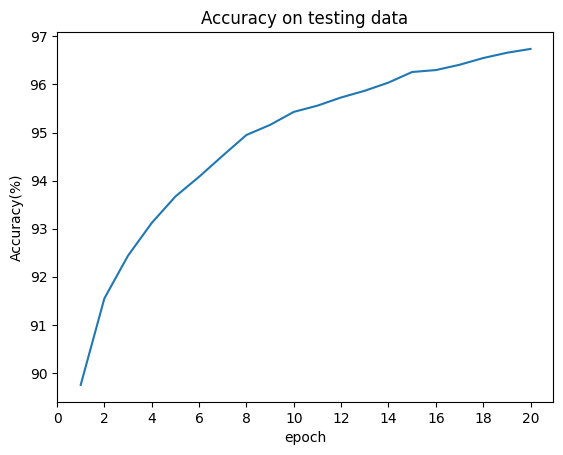

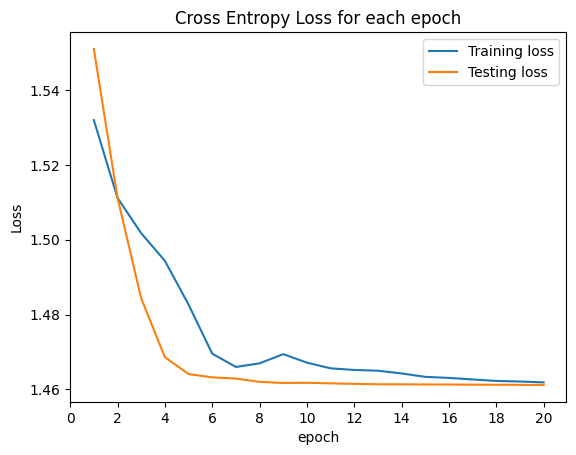

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_acc,label = 'Train loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy on testing data")
plt.show()
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_loss,label = 'Training loss')
plt.plot(range(1,epoch_num+1),epoch_test_loss,label = 'Testing loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss for each epoch')
plt.legend()
plt.show()

torch.Size([1, 28, 28])


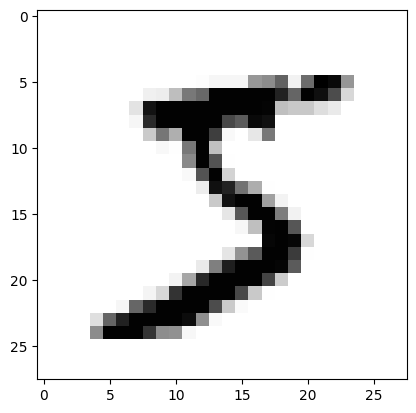

label= 5


In [9]:
print(train_loader.dataset[0][0].shape)
from matplotlib import pyplot as plt
img = torch.Tensor.numpy(train_loader.dataset[0][0]).reshape((28,28))
plt.imshow(img,cmap='Greys', interpolation='nearest')
plt.show()
print('label=',train_loader.dataset[0][1])

### **Plot failure cases:**

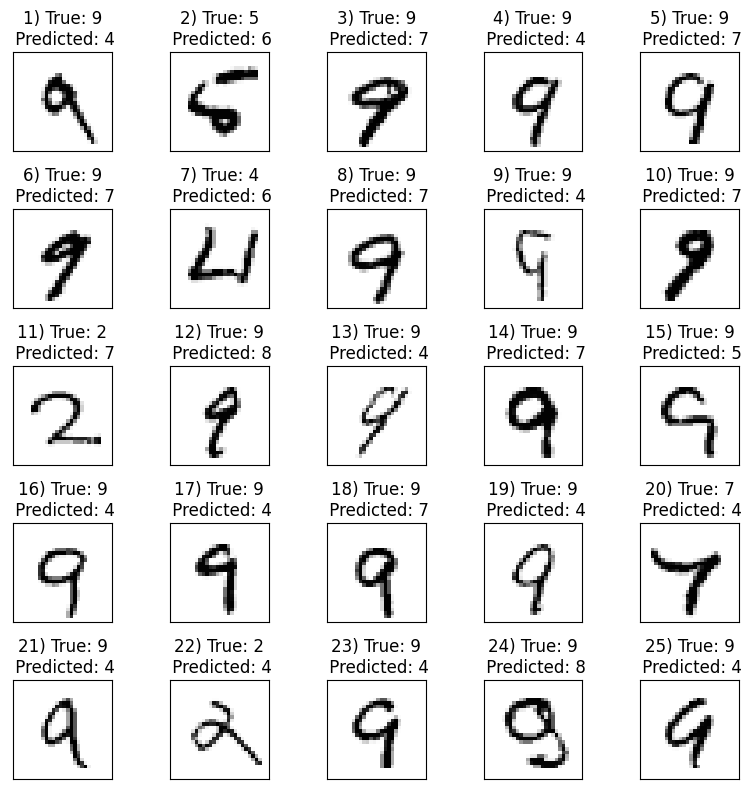

In [10]:
false = []
with torch.no_grad():  # No need for backpropagation in the training set
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images.view(-1, 28*28)).to(device)
        _, predicted = torch.max(outputs.data, 1)
        for img,pre,lab in zip(images,predicted,labels):
            if pre != lab:
                false.append((img.cpu(),lab.cpu(),pre.cpu()))

fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = false[i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {false[i][1]}\n'
                    f' Predicted: {false[i][2]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [11]:
model = MLP(input_size=784, hidden1_size=512, output_size=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,weight_decay=1e-2)

epoch_num = 20
epoch_acc = []
epoch_loss = []
epoch_test_loss = []
# Training loop
for epoch in range(epoch_num):  # Loop over the dataset multiple times
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(-1, 28*28)  # Flatten the images
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}')
    epoch_loss.append(loss.item())
    test(model,epoch_acc,epoch_test_loss,criterion)


Epoch 1, Training Loss: 2.0293
Epoch 1, Testing Loss: 1.8710
Accuracy of the network on the test images: 57 %
Epoch 2, Training Loss: 1.8295
Epoch 2, Testing Loss: 1.7658
Accuracy of the network on the test images: 71 %
Epoch 3, Training Loss: 1.7600
Epoch 3, Testing Loss: 1.7279
Accuracy of the network on the test images: 74 %
Epoch 4, Training Loss: 1.7432
Epoch 4, Testing Loss: 1.7163
Accuracy of the network on the test images: 74 %
Epoch 5, Training Loss: 1.7359
Epoch 5, Testing Loss: 1.7096
Accuracy of the network on the test images: 75 %
Epoch 6, Training Loss: 1.7314
Epoch 6, Testing Loss: 1.7053
Accuracy of the network on the test images: 75 %
Epoch 7, Training Loss: 1.7264
Epoch 7, Testing Loss: 1.7012
Accuracy of the network on the test images: 75 %
Epoch 8, Training Loss: 1.6888
Epoch 8, Testing Loss: 1.6500
Accuracy of the network on the test images: 79 %
Epoch 9, Training Loss: 1.6654
Epoch 9, Testing Loss: 1.6297
Accuracy of the network on the test images: 81 %
Epoch 10, 

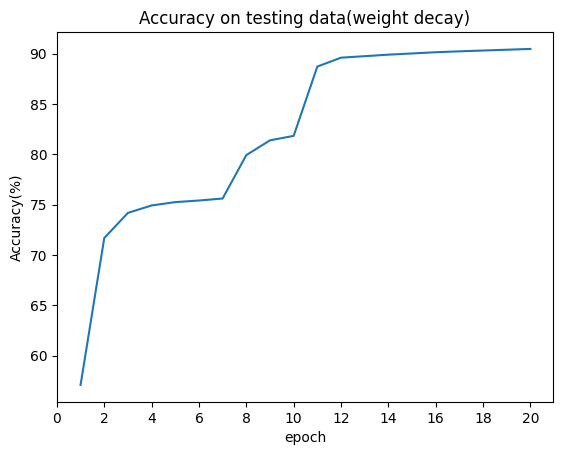

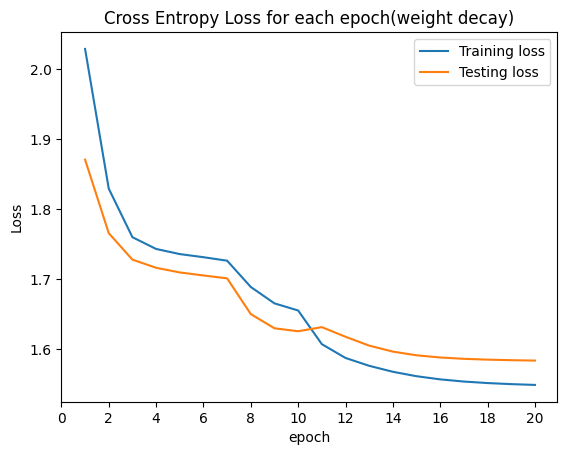

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_acc,label = 'Train loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy on testing data(weight decay)")
plt.show()
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_loss,label = 'Training loss')
plt.plot(range(1,epoch_num+1),epoch_test_loss,label = 'Testing loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss for each epoch(weight decay)')
plt.legend()
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

class DropoutMLP(nn.Module):
    def __init__(self, input_size, hidden1_size, output_size,dropout):
        super(DropoutMLP, self).__init__()
        self.dropout = dropout
        self.layer1 = nn.Linear(input_size, hidden1_size) 
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden1_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        if self.training:
            out = dropout_layer(out, self.dropout)
        out = self.layer2(out)
        out = self.softmax(out)
        return out

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X).to(device)
    mask = (torch.rand(X.shape).to(device) > dropout).float()
    return mask.to(device) * X / (1.0 - dropout)

In [18]:
model = DropoutMLP(input_size=784, hidden1_size=512, output_size=10,dropout = 0.5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epoch_num = 20
epoch_acc = []
epoch_loss = []
epoch_test_loss = []
# Training loop
for epoch in range(epoch_num):  # Loop over the dataset multiple times
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(-1, 28*28)  # Flatten the images
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}')
    epoch_loss.append(loss.item())
    test(model,epoch_acc,epoch_test_loss,criterion)

Epoch 1, Training Loss: 2.0075
Epoch 1, Testing Loss: 1.9546
Accuracy of the network on the test images: 52 %
Epoch 2, Training Loss: 1.7903
Epoch 2, Testing Loss: 1.7837
Accuracy of the network on the test images: 75 %
Epoch 3, Training Loss: 1.7385
Epoch 3, Testing Loss: 1.7406
Accuracy of the network on the test images: 79 %
Epoch 4, Training Loss: 1.6497
Epoch 4, Testing Loss: 1.7278
Accuracy of the network on the test images: 80 %
Epoch 5, Training Loss: 1.6396
Epoch 5, Testing Loss: 1.6897
Accuracy of the network on the test images: 81 %
Epoch 6, Training Loss: 1.6211
Epoch 6, Testing Loss: 1.6649
Accuracy of the network on the test images: 82 %
Epoch 7, Training Loss: 1.6138
Epoch 7, Testing Loss: 1.6851
Accuracy of the network on the test images: 82 %
Epoch 8, Training Loss: 1.6010
Epoch 8, Testing Loss: 1.6238
Accuracy of the network on the test images: 83 %
Epoch 9, Training Loss: 1.6099
Epoch 9, Testing Loss: 1.6702
Accuracy of the network on the test images: 83 %
Epoch 10, 

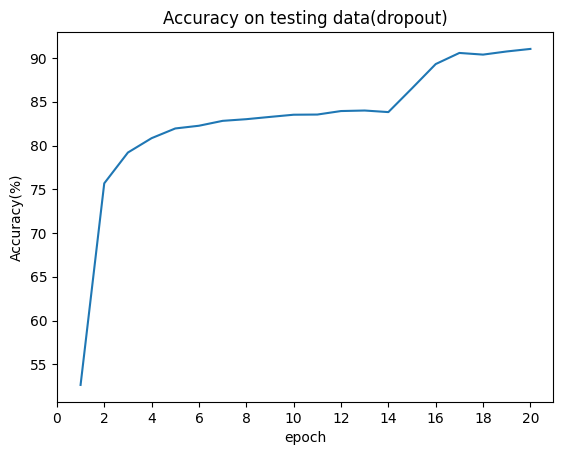

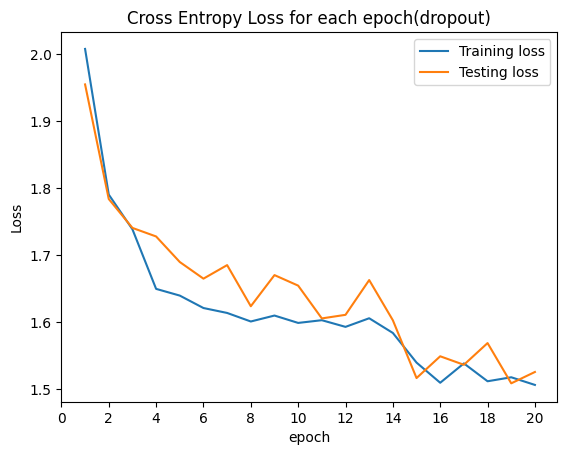

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_acc,label = 'Train loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy on testing data(dropout)")
plt.show()
plt.figure()
plt.plot(range(1,epoch_num+1),epoch_loss,label = 'Training loss')
plt.plot(range(1,epoch_num+1),epoch_test_loss,label = 'Testing loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss for each epoch(dropout)')
plt.legend()
plt.show()

In [20]:
model = MLP(input_size=784, hidden1_size=512, output_size=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,weight_decay=0.01)

epoch_num = 20
patience = 5
best_loss = float('inf')
epochs_no_improve = 0
epoch_acc = []
epoch_loss = []
epoch_test_loss = []
# Training loop
for epoch in range(epoch_num):  # Loop over the dataset multiple times
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(-1, 28*28)  # Flatten the images
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}')
    epoch_loss.append(loss.item())
    test_acc = test(model,epoch_acc, epoch_test_loss, criterion)
    
    if epoch_test_loss[-1] < best_loss:
        best_loss = epoch_test_loss[-1]
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f'Early stopping triggered after epoch {epoch+1}.')
        break

Epoch 1, Training Loss: 2.0151
Epoch 1, Testing Loss: 1.8938
Accuracy of the network on the test images: 62 %
Epoch 2, Training Loss: 1.7828
Epoch 2, Testing Loss: 1.7362
Accuracy of the network on the test images: 73 %
Epoch 3, Training Loss: 1.6875
Epoch 3, Testing Loss: 1.7150
Accuracy of the network on the test images: 81 %
Epoch 4, Training Loss: 1.6618
Epoch 4, Testing Loss: 1.6860
Accuracy of the network on the test images: 82 %
Epoch 5, Training Loss: 1.6489
Epoch 5, Testing Loss: 1.6722
Accuracy of the network on the test images: 83 %
Epoch 6, Training Loss: 1.6415
Epoch 6, Testing Loss: 1.6650
Accuracy of the network on the test images: 83 %
Epoch 7, Training Loss: 1.6369
Epoch 7, Testing Loss: 1.6608
Accuracy of the network on the test images: 83 %
Epoch 8, Training Loss: 1.6336
Epoch 8, Testing Loss: 1.6581
Accuracy of the network on the test images: 83 %
Epoch 9, Training Loss: 1.6310
Epoch 9, Testing Loss: 1.6559
Accuracy of the network on the test images: 83 %
Epoch 10, 

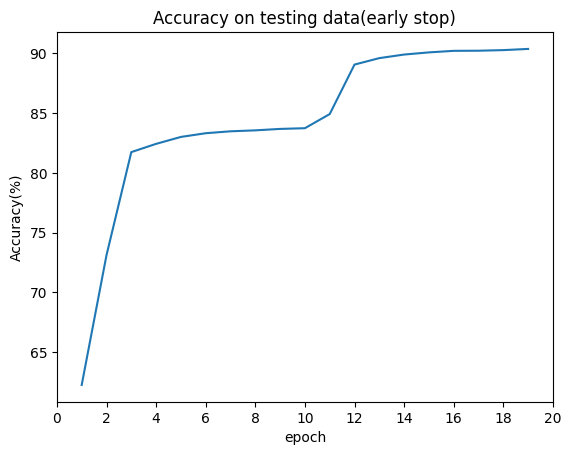

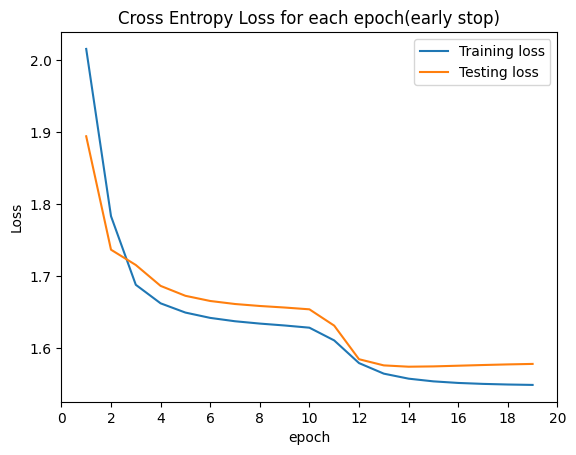

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1,len(epoch_acc)+1),epoch_acc,label = 'Train loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Accuracy(%)')
plt.title("Accuracy on testing data(early stop)")
plt.show()
plt.figure()
plt.plot(range(1,len(epoch_loss)+1),epoch_loss,label = 'Training loss')
plt.plot(range(1,len(epoch_test_loss)+1),epoch_test_loss,label = 'Testing loss')
plt.xticks(np.arange(0, epoch_num+2, step=epoch_num/10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss for each epoch(early stop)')
plt.legend()
plt.show()

ref: \
https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning \
https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E6%A9%9F-multilayer-perceptron-mlp-%E5%90%AB%E8%A9%B3%E7%B4%B0%E6%8E%A8%E5%B0%8E-ee4f3d5d1b41\
https://github.com/rocketeerli/PatternRecognitionAndDeepLearning-Lab/blob/master/DeepLearning-Lab/lab1/MLP.py
